### Notebook to check if the downloaded graph makes sense 

In [1]:
import sys, os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import skmob as skm
import osmnx as ox
import shapely
from random import random
import pickle
# as jupyter notebook cannot find __file__, import module and submodule path via current_folder
current_folder = globals()['_dh'][0]

PROJECT_SRC_PATH = os.path.realpath(os.path.join(current_folder, '..', '..', 'xml4uf'))
sys.path.append(PROJECT_SRC_PATH)

from ufo_map.Utils.helpers import *
from utils.utils import *
from utils.utils_mobility import *

CRS_BOSTON = 2806
CRS_UNI = 4326

In [11]:
# path zips
path_zips = '/Users/felix/Documents/phd/projects/11_xml4uf_global/0_raw_data/bos/mobility/BOS.shp'
# read in zip code geoms
gdf_zip = gpd.read_file(path_zips).to_crs(2806)

In [5]:
# load downloaded graoh
g = get_graph('/Users/felix/Documents/phd/projects/11_xml4uf_global/0_raw_data/bos/streets/old/bos_graph.pickle')

In [6]:
gdf_downloaded = nxg_to_gdf(g)
gdf_downloaded

,osmid,lanes,ref,name,highway,maxspeed,width,oneway,reversed,length,geometry,bridge,junction,service,access,tunnel,est_width,area
0,8615227,2,MA 139,North Avenue,secondary,35 mph,15.2,False,False,208.379,"LINESTRING (463080.079 125446.807, 463098.621 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8615227,2,MA 139,North Avenue,secondary,35 mph,15.2,False,True,238.962,"LINESTRING (463080.079 125446.807, 463048.532 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8615580,2,NaN,Bates Street,residential,NaN,12.2,False,True,106.556,"LINESTRING (463080.079 125446.807, 463042.390 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8614925,2,MA 58,Adams Street,secondary,NaN,13.7,False,False,64.784,"LINESTRING (463278.604 125381.990, 463275.784 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8614925,2,MA 58,Adams Street,secondary,NaN,13.7,False,True,103.943,"LINESTRING (463278.604 125381.990, 463285.050 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380922,884983855,NaN,NaN,Phoebe Street,residential,NaN,NaN,False,True,107.725,"LINESTRING (446493.640 196474.812, 446521.332 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
380923,1055413482,NaN,NaN,Plaver Lane,residential,NaN,NaN,False,True,62.465,"LINESTRING (446458.911 196619.490, 446449.898 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
380924,8891543,2,NaN,University Avenue,secondary,NaN,15.2,False,False,81.667,"LINESTRING (432113.544 184079.984, 432172.625 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
380925,8891543,2,NaN,University Avenue,secondary,NaN,15.2,False,True,41.278,"LINESTRING (432113.544 184079.984, 432083.989 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
gdf_join = gpd.sjoin(gdf_zip.loc[gdf_zip.tractid==20303],gdf_downloaded,how='inner')
gdf_join.head()

,tractid,my_area,geometry,index_right,osmid,lanes,ref,name,highway,maxspeed,...,oneway,reversed,length,bridge,junction,service,access,tunnel,est_width,area
894,20303,0.383946,"MULTIPOLYGON (((453109.915 152020.914, 452984....",69533,"[482011737, 970407067, 829909270]",2,NaN,Nashua Street,secondary,25 mph,...,True,False,128.412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,20303,0.383946,"MULTIPOLYGON (((453109.915 152020.914, 452984....",66211,"[8639232, 985552044]",4,NaN,Staniford Street,secondary,25 mph,...,False,True,117.716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,20303,0.383946,"MULTIPOLYGON (((453109.915 152020.914, 452984....",66215,"[8639232, 985552044]",4,NaN,Staniford Street,secondary,25 mph,...,False,False,117.716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,20303,0.383946,"MULTIPOLYGON (((453109.915 152020.914, 452984....",57922,8640929,2,NaN,William Cardinal O'Connell Way,residential,25 mph,...,False,False,318.689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,20303,0.383946,"MULTIPOLYGON (((453109.915 152020.914, 452984....",66209,8640929,2,NaN,William Cardinal O'Connell Way,residential,25 mph,...,False,True,318.689,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

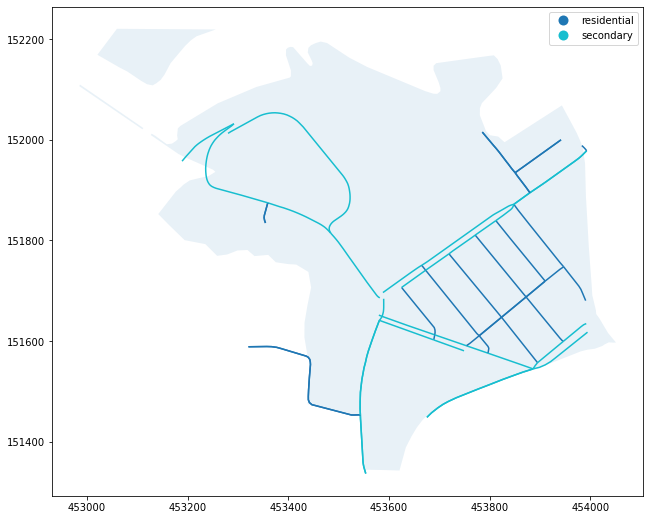

In [15]:
fig,ax = plt.subplots(figsize=(15,9))
gdf_zip.loc[gdf_zip.tractid==20303].plot(ax=ax,alpha=0.1)
gdf_downloaded.loc[gdf_join.index_right].plot(ax=ax,column='highway', legend=True)